# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

C:\Users\Admin\AppData\Local\Temp\ipykernel_1976\3107362156.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


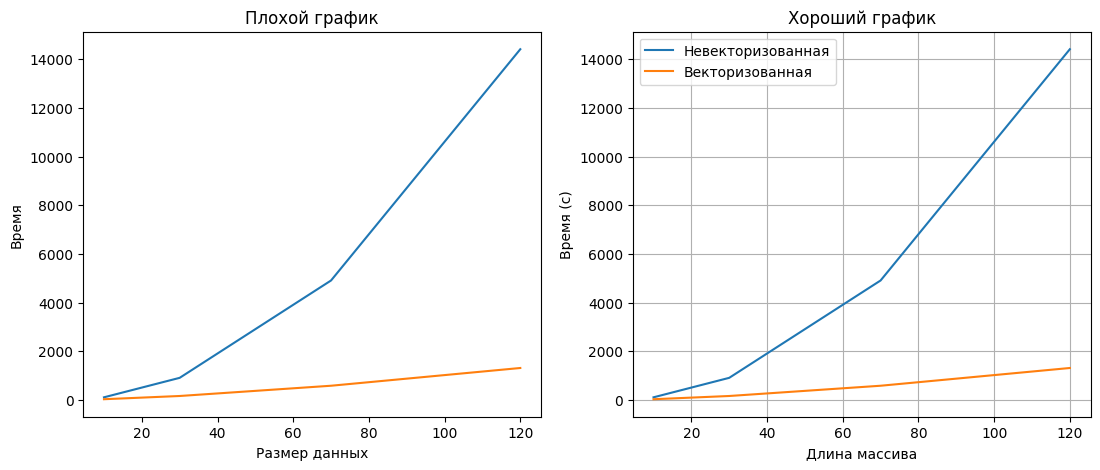

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

0.045586692961655115

0.045586692961655115


C:\Users\Admin\AppData\Local\Temp\ipykernel_1976\3582509692.py:21: RuntimeWarning: overflow encountered in scalar multiply
  res *= ms[i][i]


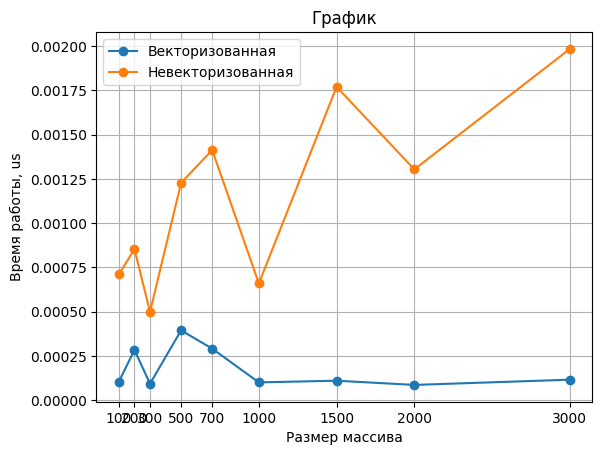

In [41]:
# code here
import random
import time
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


random.seed()

x = random.randint(3, 9)
y = random.randint(3, 9)



def prod_non_zero_diag(ms):
    res = 1
    for i in range(min(len(ms), len(ms[0]))):
        if(ms[i][i] != 0):
            res *= ms[i][i]
    return res



def prod_non_zero_diag_vect(ms):
    a = np.diag(ms)
    return a[a != 0].prod()

ms = np.random.rand(x, y)

    
print(prod_non_zero_diag_non_vect(ms))
print("")
    
    
    
start_time = time.time()
    
print(prod_non_zero_diag_vect(ms))

size_d = [100, 200, 300, 500, 700, 1000, 1500, 2000, 3000]
v_1 = []
non_v_1 = []

for size_a in size_d:
    ms = np.random.randint(-10, 10, (size_a, size_a))

    start_time = time.time()

    prod_non_zero_diag(ms)
 
    non_v =  time.time() - start_time

    start_time = time.time()

    prod_non_zero_diag_vect(ms)
    v = time.time() - start_time

    v_1.append(v)
    non_v_1.append(non_v)


plt.plot(size_d, v_1, label="Векторизованная", marker='o')
plt.plot(size_d, non_v_1, label="Невекторизованная", marker='o')
plt.xticks(size_d)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы, us')
plt.title(u'График')
plt.grid(True)
plt.legend()

plt.show()

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


True 
 True


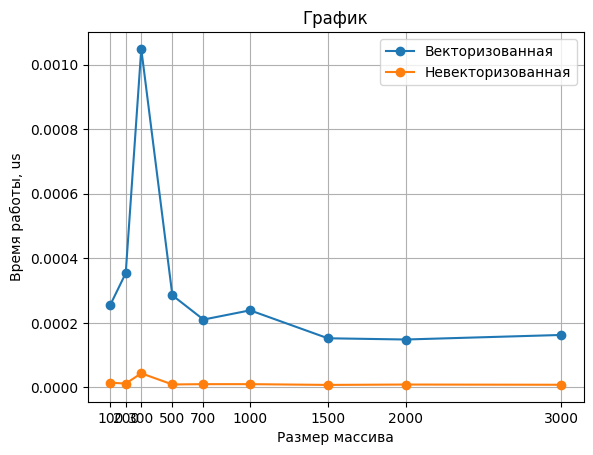

In [44]:
import numpy as np
import random

random.seed()

x = random.randint(3, 9)
y = random.randint(3, 9)

ms_1 = [1, 2, 3, 4]
ms_2 = [2, 3, 1, 4]


def are_multisets_equal(ms_1, ms_2):
    if(len(ms_1) != len(ms_2)):
        return False
    ms_1.sort()
    ms_2.sort()
    for i in range(len(ms_1)):
        if(ms_1[i] != ms_2[i]):
            return False
    return True

def are_multisets_equal_vect(ms_1, ms_2):
    ms_1_n, ms_1_c = np.unique(ms_1, return_counts=True)
    ms_2_n, ms_2_c = np.unique(ms_2, return_counts=True)
    if(np.shape(ms_1_n) != np.shape(ms_2_n)):
        return False
    if(np.any(ms_1_n != ms_2_n) or np.any(ms_1_c !=ms_2_c)):
        return False
    return True



print(are_multisets_equal(ms_1, ms_2), '\n', are_multisets_equal_vect(ms_1, ms_2))

size_d = [100, 200, 300, 500, 700, 1000, 1500, 2000, 3000]
v_1 = []
non_v_1 = []

for size_a in size_d:
    ms = np.random.randint(-10, 10, (size_a, size_a))

    start_time = time.time()

    are_multisets_equal(ms_1, ms_2)
 
    non_v =  time.time() - start_time

    start_time = time.time()

    are_multisets_equal_vect(ms_1, ms_2)
    v = time.time() - start_time

    v_1.append(v)
    non_v_1.append(non_v)


plt.plot(size_d, v_1, label="Векторизованная", marker='o')
plt.plot(size_d, non_v_1, label="Невекторизованная", marker='o')
plt.xticks(size_d)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы, us')
plt.title(u'График')
plt.grid(True)
plt.legend()

plt.show()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

0.3437751648019718 
 0.3437751648019718


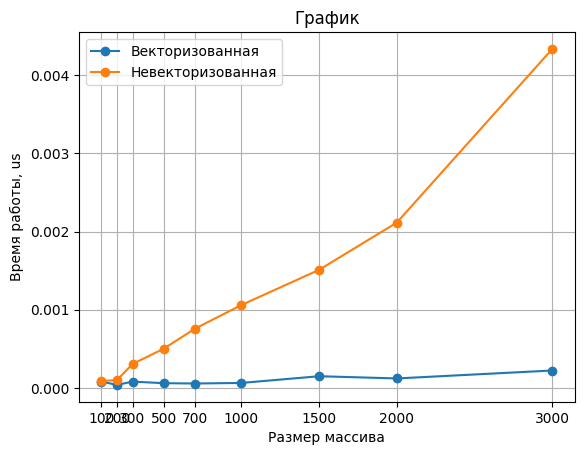

In [52]:
# code here
import numpy as np
import random

random.seed()

x = random.randint(3, 9)
y = random.randint(3, 9)

ms = np.random.rand(x)


def max_after_zero(ms):
    a = list()
    for i in range(1, len(ms)):
        if((ms[i - 1] == 0).any):
            a.append(ms[i])
    return max(a)

def max_after_zero_vect(ms):
    a = np.ones((1))
    a = np.hstack((a, ms))
    i = a == 0
    return np.max(ms)



print(max_after_zero(ms), '\n', max_after_zero_vect(ms))

size_d = [100, 200, 300, 500, 700, 1000, 1500, 2000, 3000]
v_1 = []
non_v_1 = []

for size_a in size_d:
    ms = np.random.randint(-10, 10, (size_a))

    start_time = time.time()

    max_after_zero(ms)
 
    non_v =  time.time() - start_time

    start_time = time.time()

    max_after_zero_vect(ms)
    v = time.time() - start_time

    v_1.append(v)
    non_v_1.append(non_v)


plt.plot(size_d, v_1, label="Векторизованная", marker='o')
plt.plot(size_d, non_v_1, label="Невекторизованная", marker='o')
plt.xticks(size_d)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы, us')
plt.title(u'График')
plt.grid(True)
plt.legend()

plt.show()

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow
import numpy as np

%matplotlib inline

def convert_image_vect(img, coeff):
    return np.sum(img * coeff, axis=-1)

def convert_image(img, coeff):
    height = len(img)
    width = len(img[0])
    result_img = list()
    for i in range(height):
        curr_str = list()
        for j in range(width):
            sum = 0
            for k in range(len(coeff)):
                sum += img[i][j][k] * coeff[k]
            curr_str.append(sum)
        result_img.append(curr_str)
    return result_img



img = imread('Users\Admin\Downloads\d-yellow-heart-shape-balloons.jpg')
coeff = np.array([0.299, 0.587, 0.114])
img_grey = convert_image(img, coeff)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
ax1.imshow(img)
ax1.set_title('Исходное изображение')
ax1.axis('off')
ax2.imshow(img_grey, cmap='gray')
ax2.set_title('Серое')
ax2.axis('off')

fig.show()

<>:26: SyntaxWarning: invalid escape sequence '\A'
<>:26: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Admin\AppData\Local\Temp\ipykernel_1976\1314859209.py:26: SyntaxWarning: invalid escape sequence '\A'
  img = imread('Users\Admin\Downloads\d-yellow-heart-shape-balloons.jpg')
C:\Users\Admin\AppData\Local\Temp\ipykernel_1976\1314859209.py:26: SyntaxWarning: invalid escape sequence '\A'
  img = imread('Users\Admin\Downloads\d-yellow-heart-shape-balloons.jpg')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\Documents\\GitHub\\MLAESCTeminNikita\\task1_numpy\\Users\\Admin\\Downloads\\d-yellow-heart-shape-balloons.jpg'

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

([np.float64(0.9926919566890675), np.float64(0.7741861654007515), np.float64(0.8188002155717079), np.float64(0.2695047825109016), np.float64(0.5311332935060358), np.float64(0.9124889402663424), np.float64(0.9210304064204066), np.float64(0.4774518320881439)], [1, 1, 1, 1, 1, 1, 1, 1]) (array([0.99269196, 0.77418617, 0.81880022, 0.26950478, 0.53113329,
       0.91248894, 0.92103041, 0.47745183]), array([1, 1, 1, 1, 1, 1, 1, 1]))


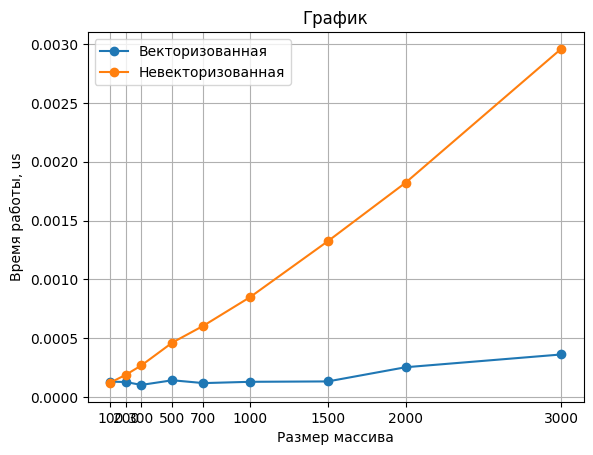

In [54]:
# code here
import numpy as np
import random

random.seed()

x = random.randint(3, 9)
y = random.randint(3, 9)

ms = np.random.rand(x)


def run_length_encoding(ms):
    a = [ms[0]]
    b = list()
    k = 1
    for i in range(1, len(ms)):
        if(ms[i - 1] == ms[i]):
            k = k + 1
        else:
            a.append(ms[i])
            b.append(k)
            k = 1
    b.append(k)
    return a, b

def run_length_encoding_vect(ms):
    a = np.hstack((np.ones(1), ms[:- 1]))
    f = ms != a
    f[0] = True
    i_1 = np.arange(np.size(ms))[f]
    i_2 = np.hstack((i_1[1:], np.array([np.size(ms)])))
    return ms[f], i_2 - i_1

print(run_length_encoding(ms), run_length_encoding_vect(ms))

size = [10, 50, 100, 200, 500, 1000]
v_1 = list()
non_v_1 = list()

size_d = [100, 200, 300, 500, 700, 1000, 1500, 2000, 3000]
v_1 = []
non_v_1 = []

for size_a in size_d:
    ms = np.random.randint(-10, 10, (size_a))

    start_time = time.time()

    run_length_encoding(ms)
 
    non_v =  time.time() - start_time

    start_time = time.time()

    run_length_encoding_vect(ms)
    v = time.time() - start_time

    v_1.append(v)
    non_v_1.append(non_v)


plt.plot(size_d, v_1, label="Векторизованная", marker='o')
plt.plot(size_d, non_v_1, label="Невекторизованная", marker='o')
plt.xticks(size_d)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы, us')
plt.title(u'График')
plt.grid(True)
plt.legend()

plt.show()

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

[[0.9306654067306435, 0.6715474720458486, 0.6693713376532017, 0.4413332926478079, 0.6383107945176212, 0.707338171464142, 0.756026136087222, 0.4913598408520287, 0.2777187049712163], [1.0553073537638427, 0.7776975672225547, 0.8294403641030611, 0.9136576179173237, 0.6452812255896303, 0.6633938586338018, 0.5803612962746043, 0.7596156383194929, 0.5395709903836717], [0.8732033777830708, 0.7872891759861393, 0.4609463678611935, 0.7837874653937276, 0.9837595366409562, 0.5744707802853405, 1.1029234625076971, 0.4141265748879538, 0.6183736990482271], [1.0366344407598969, 0.7484687762997214, 0.987591204452912, 0.37980628158072965, 0.6750585612984017, 0.9812937531870857, 0.9624775248487489, 0.9256117831139699, 0.7262307848471619], [1.055704078576741, 0.6994376619756031, 0.5913039650590425, 0.4995293647126159, 0.7046734789198568, 0.7495530304129, 0.8873014818575046, 0.44359404528092927, 0.3644618626124918], [1.0032604704085752, 0.41188986922505344, 0.6103664943977596, 0.9453349470370052, 0.6736548042

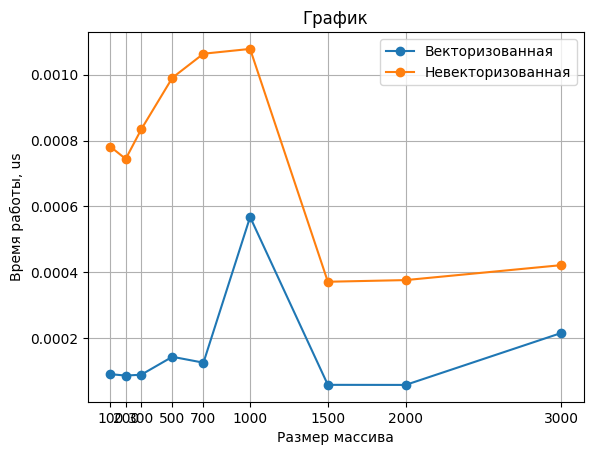

In [59]:
# code here
import numpy as np
import random
import math

random.seed()

x = random.randint(3, 9)
y = random.randint(3, 9)

ms1 = np.random.rand(x, y)
ms2 = np.random.rand(x, y)

def pairwise_distance(ms1, ms2):
    res = list()
    for i in range(len(ms1)):
        a = list()
        for j in range(len(ms2)):
            b = 0
            for k in range(len(ms1[0])):
                b += (ms1[i][k] - ms2[j][k]) ** 2
            a.append(math.sqrt(b))
        res.append(a)
    return res

def pairwise_distance_vect(ms1, ms2):
    return np.sqrt(np.sum((ms1[:, np.newaxis] - ms2) ** 2, axis=-1))

print(pairwise_distance(ms1, ms2), '\n', pairwise_distance_vect(ms1, ms2))


size_d = [100, 200, 300, 500, 700, 1000, 1500, 2000, 3000]
v_1 = []
non_v_1 = []

for size_a in size_d:
    ms = np.random.randint(-10, 10, (size_a, size_a))

    start_time = time.time()

    pairwise_distance(ms1, ms2)
 
    non_v =  time.time() - start_time

    start_time = time.time()

    pairwise_distance_vect(ms1, ms2)
    v = time.time() - start_time

    v_1.append(v)
    non_v_1.append(non_v)


plt.plot(size_d, v_1, label="Векторизованная", marker='o')
plt.plot(size_d, non_v_1, label="Невекторизованная", marker='o')
plt.xticks(size_d)
plt.xlabel(u'Размер маcсива')
plt.ylabel(u'Время работы, us')
plt.title(u'График')
plt.grid(True)
plt.legend()

plt.show()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

In [ ]:
# code here